# **Inference RT-DETR**

In [ ]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# RTDETRモデルのダウンロードと初期化
try:
    model = RTDETR('rtdetr-l.pt')
except:
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    model = RTDETR('rtdetr-l.pt')

# 推論実行
image_path = 'london-buses.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())

# **Test new model**

In [ ]:
model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論実行
image_path = r'C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg'
results = model(image_path)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
    
    # 結果の保存
    cv2.imwrite('result.jpg', r.plot())


In [14]:
from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 推論を実行: YOLOの推論
image_path = r'C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg'
results = model(image_path, save=False)

for r in results:
    boxes = r.boxes  # YOLOv8の場合

    # YOLO形式出力
    for box in boxes:
        cls_id = int(box.cls[0])  # クラスID
        x_center, y_center, width, height = box.xywhn[0]

        # YOLO形式: class x_center y_center width height
        # 小数点以下6桁で出力したい場合
        print(f"{cls_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    # 検出結果を画像に描画して表示
    # plt.figure(figsize=(12, 8))
    # plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    # plt.axis('off')
    # plt.show()

    # 結果の保存
    #cv2.imwrite('result.jpg', r.plot())



image 1/1 C:\Users\ykita\FacePhoto_instance\inference\cereba\000001.jpg: 640x640 1 Right_eye, 1 Left_eye, 240.9ms
Speed: 12.3ms preprocess, 240.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
0 0.606280 0.523569 0.107366 0.027173
1 0.386395 0.505511 0.097299 0.033053



0: 640x640 1 Right_eye, 1 Left_eye, 242.4ms
Speed: 17.4ms preprocess, 242.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


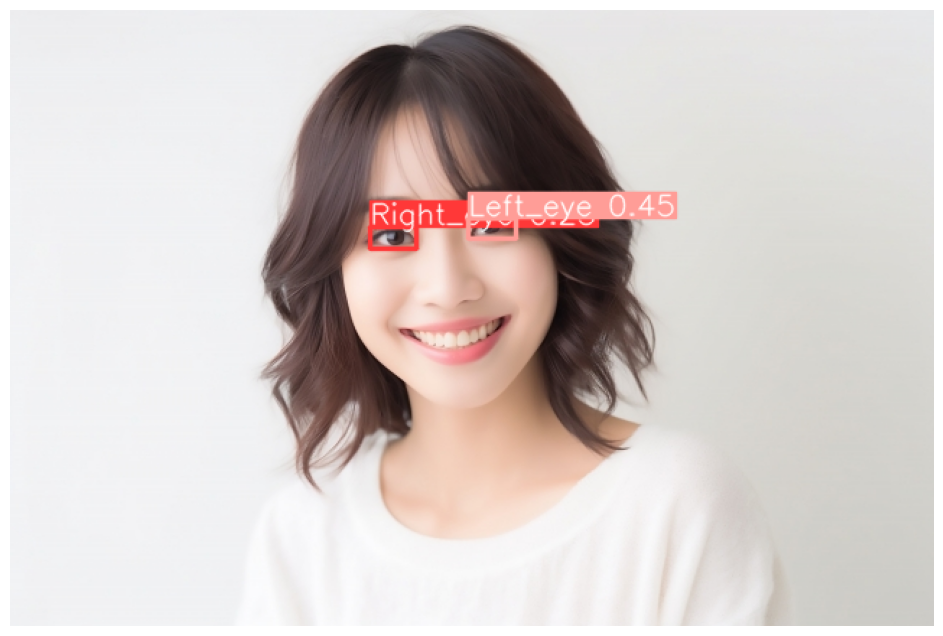

In [16]:
#Web画像の場合

from ultralytics import RTDETR
import wget
import cv2
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# モデルが未定義ならロードする
try:
    model  # 変数modelが定義されているか確認
except NameError:
    print("modelが未定義のため、ロードを実行します。")
    model = RTDETR(r"C:\Users\ykita\FacePhoto_instance\models\135best_rtdetr.pt")

# 画像URLの指定
url = "https://365dentist.jp/wp-content/uploads/2023/06/26579868_s.jpg"

# 画像のダウンロード
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# 推論実行
results = model(img)

# 結果の表示と保存
for r in results:
    # 画像をプロットして表示
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(r.plot(), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# **RT-DETR トレーニングフォルダ構成**
```
project_root/
│
├── data/
│   ├── dataset.yaml       # データセットの設定ファイル
│   │
│   ├── train/
│   │   ├── images/       # トレーニング用の画像
│   │   │   ├── img1.jpg
│   │   │   ├── img2.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/      # トレーニング用のラベル（アノテーション）
│   │       ├── img1.txt
│   │       ├── img2.txt
│   │       └── ...
│   │
│   ├── val/
│   │   ├── images/      # 検証用の画像
│   │   │   ├── img1.jpg
│   │   │   └── ...
│   │   │
│   │   └── labels/     # 検証用のラベル
│   │       ├── img1.txt
│   │       └── ...
│   │
│   └── test/           # (オプション) テスト用のデータセット
│       ├── images/
│       └── labels/
│
└── dataset.yaml        # データセット設定ファイルの内容例:
```


## **dataset.yaml**

```
# train and val data as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
train: ./data/images/train
val: ./data/images/valid

# number of classes
nc: 2

# class names:
  0: Right_eye
  1: Left_eye

```

In [27]:
# データの前処理
# 目的: 画像ファイルとラベルファイルの対応関係を確認
# 処理内容:
# 1. ラベルディレクトリとイメージディレクトリのパスを設定
# 2. 各ディレクトリからファイル名(拡張子なし)を取得
# 3. ラベルが存在しない画像ファイルを特定
# 4. 不一致の数を表示

import os

# ラベルとイメージのディレクトリパス
labels_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
images_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"

# ラベルファイルの basename (拡張子なし) を取得
label_files = {os.path.splitext(f)[0] for f in os.listdir(labels_dir) if f.endswith('.txt')}

# 画像ファイルの basename (拡張子なし) を取得
image_files = {os.path.splitext(f)[0] for f in os.listdir(images_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff'))}

# ラベルが存在しない画像ファイルを見つける
images_without_labels = image_files - label_files

# 結果を表示
print(f"n_label_files: {len(label_files)}")
print(f"n_image_files: {len(image_files)}")
print(f"ラベルが存在しない画像ファイルの数: {len(images_without_labels)}")

n_label_files: 2287
n_image_files: 2287
ラベルが存在しない画像ファイルの数: 0


In [26]:
# ラベルが存在しない画像ファイルを削除
for img_name in images_without_labels:
    for ext in ['.jpg', '.jpeg', '.png', '.tif', '.tiff']:
        img_path_with_ext = os.path.join(images_dir, img_name + ext)
        if os.path.exists(img_path_with_ext):
            try:
                os.remove(img_path_with_ext)
                print(f"削除しました: {img_path_with_ext}")
            except OSError as e:
                print(f"削除に失敗しました {img_path_with_ext}: {e}")

# 画像が存在しないラベルファイルを削除
labels_without_images = label_files - image_files
for label_name in labels_without_images:
    label_path = os.path.join(labels_dir, label_name + '.txt')
    try:
        os.remove(label_path)
        print(f"削除しました: {label_path}")
    except OSError as e:
        print(f"削除に失敗しました {label_path}: {e}")

print("不一致ファイルの削除が完了しました")

削除しました: C:\Users\ykita\FacePhoto_instance\data\images\128-20190508-47-135005_fed5582711f2ebfae749ae7bc8ba6a1dfe8613ffc26cb4d585e4cb745c263c8b.tif
削除しました: C:\Users\ykita\FacePhoto_instance\data\images\128-20190508-47-134032_5db81163ba9370f7b47e896a86662b51eecc24df7b5e095a28e728cb3d823219.tif
不一致ファイルの削除が完了しました


In [24]:
# 1. 指定されたディレクトリから画像ファイル(.jpg, .png, .tif)を取得
# 2. 画像ファイルをランダムに並び替え
# 3. train/validディレクトリを作成
# 4. データを8:2の比率で分割
# 5. 画像ファイルと対応するラベルファイル(.txt)を適切なディレクトリに移動

import os
import shutil
import random
from tqdm import tqdm

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
data_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
src_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
src_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"

# ソースディレクトリの画像ファイルを直接取得（サブディレクトリを除く）
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    print(f"見つかった画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # データの分割
    random.shuffle(image_files)
    train_size = int(len(image_files) * 0.8)
    train_files = image_files[:train_size]
    valid_files = image_files[train_size:]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データ数: {len(train_files)}")
    print(f"検証データ数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

見つかった画像ファイル数: 981


validデータの移動: 100%|██████████| 197/197 [00:00<00:00, 777.49it/s]

訓練データ数: 784
検証データ数: 197
データの分割と移動が完了しました


In [28]:
######################################
## 患者ごとにstratifyして分割する場合 ##
######################################

import os
import shutil
import random
from tqdm import tqdm
from collections import defaultdict

# データディレクトリのパス設定
data_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
data_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"
src_img_dir = r"C:\Users\ykita\FacePhoto_instance\data\images"
src_label_dir = r"C:\Users\ykita\FacePhoto_instance\data\labels"

# ソースディレクトリの画像ファイルを取得
image_files = [f for f in os.listdir(src_img_dir) 
               if f.lower().endswith(('.jpg', '.jpeg', '.png', '.tif', '.tiff')) 
               and os.path.isfile(os.path.join(src_img_dir, f))]

if not image_files:
    print("エラー: 画像ファイルが見つかりません")
else:
    # 患者IDごとにファイルをグループ化
    patient_files = defaultdict(list)
    for img_file in image_files:
        patient_id = img_file.split('-')[0]  # 最初のハイフンより左の部分を患者IDとして取得
        patient_files[patient_id].append(img_file)
    
    print(f"総患者数: {len(patient_files)}")
    print(f"総画像ファイル数: {len(image_files)}")
    
    # train/validディレクトリの作成
    for split in ['train', 'valid']:
        img_split_dir = os.path.join(data_img_dir, split)
        label_split_dir = os.path.join(data_label_dir, split)
        
        os.makedirs(img_split_dir, exist_ok=True)
        os.makedirs(label_split_dir, exist_ok=True)

    # 患者IDのリストを作成してシャッフル
    patient_ids = list(patient_files.keys())
    random.shuffle(patient_ids)
    
    # 患者IDを8:2で分割
    train_size = int(len(patient_ids) * 0.8)
    train_patient_ids = set(patient_ids[:train_size])
    valid_patient_ids = set(patient_ids[train_size:])
    
    # 分割されたファイルリストを作成
    train_files = [f for pid in train_patient_ids for f in patient_files[pid]]
    valid_files = [f for pid in valid_patient_ids for f in patient_files[pid]]

    # ファイルの移動関数
    def move_files(files, split):
        for img_file in tqdm(files, desc=f"{split}データの移動"):
            try:
                # 画像ファイルの移動
                src_img_path = os.path.join(src_img_dir, img_file)
                dst_img_path = os.path.join(data_img_dir, split, img_file)
                
                if os.path.exists(src_img_path):
                    shutil.move(src_img_path, dst_img_path)

                # 対応するラベルファイルの移動
                label_file = os.path.splitext(img_file)[0] + '.txt'
                src_label_path = os.path.join(src_label_dir, label_file)
                dst_label_path = os.path.join(data_label_dir, split, label_file)
                
                if os.path.exists(src_label_path):
                    shutil.move(src_label_path, dst_label_path)

            except Exception as e:
                print(f"エラーが発生しました ({img_file}): {str(e)}")

    # trainとvalidそれぞれにファイルを移動
    move_files(train_files, 'train')
    move_files(valid_files, 'valid')

    print(f"訓練データの患者数: {len(train_patient_ids)}")
    print(f"検証データの患者数: {len(valid_patient_ids)}")
    print(f"訓練データの画像数: {len(train_files)}")
    print(f"検証データの画像数: {len(valid_files)}")
    print("データの分割と移動が完了しました")

総患者数: 289
総画像ファイル数: 2287


validデータの移動: 100%|██████████| 547/547 [00:00<00:00, 652.82it/s]

訓練データの患者数: 231
検証データの患者数: 58
訓練データの画像数: 1740
検証データの画像数: 547
データの分割と移動が完了しました


## **YAMLファイルを作成**

In [2]:
import yaml
import os

data = {
    'train': r'C:\Users\ykita\FacePhoto_instance\data\images\train',
    'val': r'C:\Users\ykita\FacePhoto_instance\data\images\valid',
    'nc': 2,
    'names': {
        0: 'Right_eye',
        1: 'Left_eye',
    }
}

yaml_path = 'data/data.yaml'

# dataディレクトリが存在しない場合は作成
os.makedirs('data', exist_ok=True)

# ファイルの存在確認
if os.path.exists(yaml_path):
    print(f"既存の {yaml_path} を上書きします。")
else:
    print(f"新規に {yaml_path} を作成します。")

# YAMLファイルの書き出し（既存ファイルは上書き）
with open(yaml_path, 'w', encoding='utf-8') as f:
    yaml.safe_dump(data, f, sort_keys=False, allow_unicode=True)

print("処理が完了しました。")

既存の data/data.yaml を上書きします。
処理が完了しました。


# **Train RT-DETR**

In [ ]:
from ultralytics import RTDETR
from ultralytics import YOLO
import wget

# RTDETRモデルのダウンロードと初期化
try:
    model = RTDETR('rtdetr-l.pt')
    # model = YOLO("yolo11lpt")  # load a pretrained model (recommended for training)
except:
    wget.download('https://github.com/ultralytics/assets/releases/download/v0.0.0/rtdetr-l.pt')
    model = RTDETR('rtdetr-l.pt')
    # wget.download('https://github.com/ultralytics/assets/releases/download/v8.3.0/yolo11l.pt')
    # model = YOLO("yolo11l.pt")  # load a pretrained model (recommended for training)

# Fine-tune
results = model.train(data=r'C:\Users\ykita\FacePhoto_instance\data\data.yaml', epochs=1000, batch=8, fliplr=0, imgsz=640)

In [2]:
from ultralytics import RTDETR
model = RTDETR(r'C:\Users\ykita\FacePhoto_instance\rtdetr-l.pt')
# Fine-tune
results = model.train(data=r'C:\Users\ykita\FacePhoto_instance\data\data.yaml', epochs=1000, patience=50, batch=8, fliplr=0, imgsz=640, multi_scale=True)

New https://pypi.org/project/ultralytics/8.3.69 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.68  Python-3.8.6 torch-2.4.1+cu124 CUDA:0 (Quadro RTX 5000, 16384MiB)
engine\trainer: task=detect, mode=train, model=C:\Users\ykita\FacePhoto_instance\rtdetr-l.pt, data=C:\Users\ykita\FacePhoto_instance\data\data.yaml, epochs=1000, time=None, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train15, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=N

train: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\train.cache... 1740 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1740/1740 [00:00<?, ?it/s]
val: Scanning C:\Users\ykita\FacePhoto_instance\data\labels\valid.cache... 547 images, 0 backgrounds, 0 corrupt: 100%|██████████| 547/547 [00:00<?, ?it/s]


Plotting labels to runs\detect\train15\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 143 weight(decay=0.0), 206 weight(decay=0.0005), 226 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train15
Starting training for 1000 epochs...

      Epoch    GPU_mem  giou_loss   cls_loss    l1_loss  Instances       Size


  0%|          | 0/218 [00:00<?, ?it/s]c:\Users\ykita\FacePhoto_instance\instanceenv\lib\site-packages\torch\autograd\graph.py:769: UserWarning: grid_sampler_2d_backward_cuda does not have a deterministic implementation, but you set 'torch.use_deterministic_algorithms(True, warn_only=True)'. You can file an issue at https://github.com/pytorch/pytorch/issues to help us prioritize adding deterministic support for this operation. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\Context.cpp:87.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
     1/1000      13.9G     0.4972      2.478     0.2748         20        608:  94%|█████████▍| 206/218 [02:24<00:08,  1.43it/s]


KeyboardInterrupt: 

In [1]:
import torch

# GPUの確認
if torch.cuda.is_available():
    print("GPUが利用可能です。")
    print(f"使用可能なGPUの数: {torch.cuda.device_count()}")
    print(f"使用中のGPU: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("GPUは利用できません。")


GPUが利用可能です。
使用可能なGPUの数: 1
使用中のGPU: Quadro RTX 5000
